# Brownian motion on the Sphere

## Introduction

En este notebook vamos a simular la evolución de una o varias; un ensamble, partículas realizando movimiento browniano sobre la superficie de la esfera.

Esencialmente calcularemos cuatro cosas para compararlas con una solución analítica para este caso sencillo

    - El promedio de la coordenada polar,
    - El promedio de la coordenada azimuthal,
    - La varianza de la coordenada polar,
    - La varianza de la coordenada azimuthal,
    - El histograma como función del tiempo,
    - Graficaremos la evolución temporal de la solución analítica.
    - Tiempo promedio de escape de una región $\Omega$

### Mínimo de librerías necesarias

In [2]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

### Código

In [1]:
# %load Brownian_Sphere_code_02.py

import numpy as np
from matplotlib import pyplot as plt

#Funcion que toma un vector y regresa otro ortogonal a este.
def orto(x):
    if np.dot(x,x) == 0:
        return 'Pendejo: ese es el vector cero!'
    else:
        if 0 not in x:
            v1 = 1
            v2 = -(x[0]/x[1])
            v3 = 0
            #return np.array([v1,v2,v3])
        else:
            if x[0] == 0:
                if x[1] == 0:
                    v1 = 1
                    v2 = 0
                    v3 = 0
                else:
                    v1 = 0
                    v2 = 0
                    v3 = 1
            elif x[1] == 0:
                v1 = 0
                v2 = 1
                v3 = 0
            else:
                v1 = 0
                v2 = 0
                v3 = 1
        return np.array([v1,v2,v3])
    
#Funcion que regresa dos vectores; numpy arrays, de 3D ortogonales al vector de imput x.
def base_ort_nor(x):
    y = orto(x)
    v1 = y/np.linalg.norm(y)
    z = np.cross(x,v1)
    v2 = z/np.linalg.norm(z)
    return v1, v2


#Esta funcion genera un vector con distrubucion uniforme en las direcciones sobre un plano tangente a la esfera de radio R.
def vector_des(v1,v2):
    na = 2*np.pi*np.random.rand()
    vn = v1*np.cos(na) + v2*np.sin(na)
    return vn/np.linalg.norm(vn)

R = 1

#Normalizamos al vector de desplazamiento para que intersecte al vector de la nueva posicion de acuerdo con que el
#desplazamiento (s) sobre la esfera, sobre este arco de circulo maximo, sea el determinado por el movimiento browniano particular.
def vector_q(x,s):
    q = (R)*np.tan(s/(R))
    return q*x

#Dados todos los datos anteriores, esta funcion actualiza la posición de la particula.
def nuevo_r(r, vector_q):
    y = r + vector_q
    y = y/np.linalg.norm(y)
    return (R)*y

#Esta funcion ensambla todo lo anterior: como imput necesita una pocision inicial y un arco de desplazamiento
#Como output da un vector de posicion nuevo dada un tipo de desplazamiento.
def actualiza(r,s):
    v1, v2 = base_ort_nor(r)
    pre_q = vector_des(v1,v2)
    q = vector_q(pre_q, s)
    return nuevo_r(r, q)

#Esta funcion cuando es llamada grafia la posicion de la particula browniana
#sobre la superficie de una esfera sobre la que se esta difundiendo.
def plot_particle(r,i):
    from mpl_toolkits.mplot3d import axes3d
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm

    #import matplotlib.pyplot as plt
    #import numpy as np
    from itertools import product, combinations
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")

    #draw a point
    ax.scatter([r[0]],[r[1]],[r[2]],color="b",s=100)
    
    
    
    

    #draw sphere
    u, v = np.mgrid[0:2*np.pi:50j, (np.pi/7):np.pi:50j]
    x=R*np.cos(u)*np.sin(v)
    y=R*np.sin(u)*np.sin(v)
    z=R*np.cos(v)
    #ax.plot_surface(x, y, z, color="r", alpha = 0.15)
    ax.plot_surface(x, y, z, cmap=cm.YlGnBu_r,rstride=1, cstride=1, alpha = 0.55, linewidth = 0.15)



    #draw patch
    u, v = np.mgrid[0:2*np.pi:50j, 0:(np.pi/7):50j]
    x=R*np.cos(u)*np.sin(v)
    y=R*np.sin(u)*np.sin(v)
    z=R*np.cos(v)
    ax.plot_surface(x, y, z, color="r", alpha = 0.25)
    


    ax.view_init(80, 30)
    #fig.savefig('BS_Rand_01.{}.png'.format(i))
    
    plt.show()
    

    
#Esta funcion Genera n posiciones aleatorias sobre la superficie de la esfera de radio R.
#El proposito de tener esta funcion es el de generar de manera automatizada
#Una condicion inicial con distribucion uniforme sobre la esfera para varaias particulas Brownianas.
def P_INS(n,R):
    l = []
    for i in range(n):
        a1 = 2*np.pi*np.random.rand()
        a2 = np.pi*np.random.rand()
        l.append(np.array([R*np.sin(a2)*np.cos(a1),R*np.sin(a2)*np.sin(a1),R*np.cos(a2)]))
    return l

#Esta funcion cuando es llamada grafia la posicion de las partoculas brownianas.
#sobre la superficie de una esfera sobre la que se esta difundiendo.
def plot_particles(lista, vpolar, vazim, numero):
    from mpl_toolkits.mplot3d import axes3d
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm

    #import matplotlib.pyplot as plt
    #import numpy as np
    from itertools import product, combinations
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")

    



    #draw sphere
    R = 1
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    x=R*np.cos(u)*np.sin(v)
    y=R*np.sin(u)*np.sin(v)
    z=R*np.cos(v)
    #ax.plot_surface(x, y, z, color="r", alpha = 0.15)

    ax.plot_surface(x, y, z, cmap=cm.YlGnBu_r,rstride=1, cstride=1, alpha = 0.55, linewidth = 0.15)
    ax.view_init(vpolar, vazim)
    #draw patch
    #u, v = np.mgrid[0:2*np.pi:50j, 0:(np.pi/7):50j]
    #x=R*np.cos(u)*np.sin(v)
    #y=R*np.sin(u)*np.sin(v)
    #z=R*np.cos(v)
    #ax.plot_surface(x, y, z, color="r", alpha = 0.25)    
    
    #draw points
    for p in lista:
        ax.scatter([p[0]],[p[1]],[p[2]],color="b",s=150)
    
    fig.savefig('BS_Obs_01.{}.png'.format(nombre(numero)))
    #ax.view_init(80, 30)
    plt.show()
    
#Esta función actualiza la posicion de todos los elementos de una lista; partícula brownianas.
def act_n(lista,s):
    l = []
    for v in lista:
        l.append(actualiza(v,s))
    return l

#Esta funcion simula la evolucion de n particulas brownianas difundiendose sobre la superficie de una esfera.
#Grafica cada paso o instantanea del sistema completo.
def sim_n_pb(lista, m):
    plot_particles(lista)
    sigma = lista
    for i in range(m):
        eta = act_n(sigma)
        plot_particles(eta)
        sigma = eta
        
#Funcion que pone n particulas en el polo norte de una esfera
def polo_n(n, R):
    l = []
    for i in range(n):
        l.append(np.array([0,0,R]))
    return l


#Operador de Rotación


def rot_theta(r, theta, u):
    x = np.array([np.cos(theta) + (u[0]*u[0])*(1 - np.cos(theta)), u[0]*u[1]*(1 - np.cos(theta)) - u[2]*np.sin(theta), u[0]*u[2]*(1 - np.cos(theta)) + u[1]*np.sin(theta)])
    y = np.array([u[1]*u[0]*(1 - np.cos(theta)) + u[2]*np.sin(theta), np.cos(theta) + u[1]*u[1]*(1 - np.cos(theta)), u[1]*u[2]*(1 - np.cos(theta)) - u[0]*np.sin(theta)])
    z = np.array([u[2]*u[0]*(1 - np.cos(theta)) - u[1]*np.sin(theta), u[2]*u[1]*(1 - np.cos(theta)) + u[0]*np.sin(theta), np.cos(theta) + u[2]*u[2]*(1 - np.cos(theta))])
    R = np.array([x,y,z])
    return np.dot(R, r)


#Huella de la trayectoria
#La siguiente funcion hace una particion de la trayectoria sobre s en n pedazos y regresa
#una lista de los vectores de esas posiciones sobre la esfera.
#Usa al operador de rotacion.

def b_steps(ri,rf,n):
    l = [ri]
    r0 = ri
    theta = np.arccos((np.dot(ri,rf))/((np.linalg.norm(ri))*(np.linalg.norm(rf))))
    normal = np.cross(ri, rf)/ np.linalg.norm(np.cross(ri,rf))
    for i in range(1,n + 1):
        vi = rot_theta(r0, theta/n, normal)
        l.append(vi)
        r0 = vi
    return l



#Transformacion de coordenada de esfericas a cartesianas.


def trans_s_c(r,theta, phi):
    x = r*np.sin(theta)*np.cos(phi)
    y = r*np.sin(theta)* np.sin(phi)
    z = r*np.cos(theta)
    return x, y, z


#Transformacion de coordenadas de cartesianas a esfericas.

def trans_c_s(x,y,z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi = np.arctan(y/z)
    return r, theta, phi




def r_uni(theta, phi):
    x = np.sin(theta)*np.cos(phi)
    y = np.cos(theta)*np.cos(phi)
    z = np.cos(theta)
    return np.array([x,y,z])
def theta_uni(theta, phi):
    x = np.cos(theta)*np.cos(phi)
    y = np.cos(theta)*np.sin(phi)
    z = -np.sin(theta)
    return np.array([x,y,z])
def phi_uni(theta, phi):
    x = -np.sin(theta)
    y = np.cos(phi)
    z = 0
    return np.array([x,y,z])



def collision_update(lista_vect, r_omega, theta_omega):
    for v in lista_vect:
        #angulo = np.arccos(np.dot(v,r_omega)/(np.linalg.norm(v)*np.linalg.norm(r_omega)))
        #print angulo, theta_omega
        tamanho = (R**2)*np.cos(theta_omega)
        if np.dot(v,r_omega) >= tamanho:
            print 'Choco el mother fucker'
            rp = v
            np_prima = np.cross(np.cross(r_omega, rp), rp)
            nor_p = np_prima/np.linalg.norm(np_prima)
            up_prima = np.cross(np.cross(lista_vect[0], lista_vect[-1]), rp)
            up = up_prima/np.linalg.norm(up_prima)
            tp_prima = np.cross(rp, nor_p)
            tp = tp_prima/np.linalg.norm(tp_prima)
            x = (np.dot(up,tp))*tp - (np.dot(up, nor_p))*nor_p
            v_rot_prima = np.cross(rp, x)
            v_rot = v_rot_prima/np.linalg.norm(v_rot_prima)
            ang_dif = np.arccos(np.dot(v,lista_vect[-1])/(np.linalg.norm(v)*np.linalg.norm(lista_vect[-1])))
            posicion_final = rot_theta(rp, ang_dif, v_rot)
            return v, posicion_final
        else:
            continue
    print 'no choco el mother fucker'
    return lista_vect[0], lista_vect[-1]
def nombre(s):
    diferencia = 4 - len(str(s))
    ceros = '' 
    for i in range(diferencia):
        ceros = ceros + '0'
    variable = ceros + str(s)
    return variable

#Varianza para una distribucion bigaussiana; difusion en 2D
def var(D, delta_t):
    return 4*D*delta_t


#Arco de circulo maximo con distribucion normal alrededor de cero y una varianza dada por

def ese(D,delta_t):
    return abs(np.random.normal(loc = 0., scale = np.sqrt(var(D,delta_t)),size = None))




#Definimos las condiciones inciales

# R es el radio de la esfera

R=1
def exit_time(R):
    t0 = 0
    x0 = np.array([0,0,R])
    x = x0
    t = t0
    for i in range(550):
        t = t + 25e-6
        x = actualiza(x,ese())
        #plot_particle(x,i)
        theta_x = np.arccos(x[2]/R)
        if theta_R < theta_x:
            return  t
        else:
            continue
    return 'no salio de la region'





De manera rutinaria necesitaresmo crear carpetas donde guardar los `snapshots`de nuestras simulaciones.

In [2]:
!pwd

/Users/adriano/Documents/Tesis_Maestria/Notebooks_ipy


In [11]:
!mkdir Histograma_Thesis_theta_NO_02

In [12]:
%cd /Users/adriano/Documents/Tesis_Maestria/Notebooks_ipy/Histograma_Thesis_theta_NO_02/

/Users/adriano/Documents/Tesis_Maestria/Notebooks_ipy/Histograma_Thesis_theta_NO_02


In [46]:
!mkdir Histograma_Theta_NO_04

In [47]:
%cd Histograma_Theta_NO_04/

/Users/adriano/Documents/Tesis_Maestria/Notebooks_ipy/Histograma_Theta_NO_04


In [48]:
!pwd

/Users/adriano/Documents/Tesis_Maestria/Notebooks_ipy/Histograma_Theta_NO_04


In [13]:
%cd /Users/adriano/Documents/Tesis_Maestria/Notebooks_ipy/

/Users/adriano/Documents/Tesis_Maestria/Notebooks_ipy


### Cálculo Numérico de $D$

In [14]:
!pwd

/Users/adriano/Documents/Tesis_Maestria/Notebooks_ipy/Histograma_Thesis_theta_NO_02


A continuación definimos los valores de el parámetros $D$ y de el tamaño del paso para los incrementos del tiempo.

In [43]:
R = 1.
D = 1.
dt = 1e-3

In [65]:
#R = 1
#D = 1
#dt = 1e-3*np.log(10)
origen = polo_n(10000,R)
promedio_theta_en_t = [0]
promedio_phi_en_t = [0]
promedio_cos_theta = [np.cos(0)]
var_theta_en_t = [0]
var_phi_en_t = [0]
posicion_vec = origen
t_final = 2500

for i in range(t_final):
    nuevos_vec = act_n(posicion_vec, ese(D,dt))
    thetas = []

    phis = []

    for v in nuevos_vec:
        theta = np.arccos(v[2]/R)
        phi = np.arctan(v[1]/v[0])
        thetas.append(theta)

        phis.append(phi)

    
    #Aqui vamos a salvar una instantanea de cada uno de los histogramas
    #de theta
    #plt.hist(thetas, 50, color = 'g', alpha = 0.6, normed = "true")
    #plt.xlabel(r"$\theta$", fontsize = 15)
    #plt.xlim(0,np.pi)
    #plt.ylabel(r"$n(\theta)/10000$", fontsize = 15)
    #plt.ylim(0,1)
    #plt.title("Paso = {}".format(i), fontsize = 15)
    #plt.savefig('Histograma_theta_{}'.format(nombre(i)), dpi = 600, bbox_inches = 'tight')
    #plt.close()
    mean_cos_theta = np.mean(np.cos(thetas))
    mean_theta = np.mean(thetas)
    mean_phi = np.mean(phis)

    var_theta_en_t.append(np.var(thetas))
    var_phi_en_t.append(np.var(phis))
    promedio_theta_en_t.append(mean_theta)
    promedio_phi_en_t.append(mean_phi)
    posicion_vec = nuevos_vec
    promedio_cos_theta.append(mean_cos_theta)

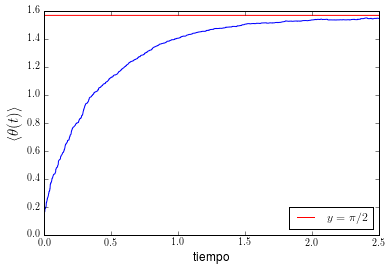

In [66]:
npasos = t_final
suma = 0
tiempos = [0]
impulso = dt
for i in range(npasos):
    suma += impulso
    tiempos.append(suma)
    
    
plt.rc('text', usetex=True)
plt.plot(tiempos,promedio_theta_en_t)
plt.plot(tiempos, np.pi/2*np.ones(len(tiempos)), 'r', label ="$y = \pi/2$")
plt.ylabel(r'$\langle \theta(t)\rangle$', fontsize = 15)
plt.xlabel('tiempo', fontsize = 12)
plt.legend(loc=4); # Down right corner

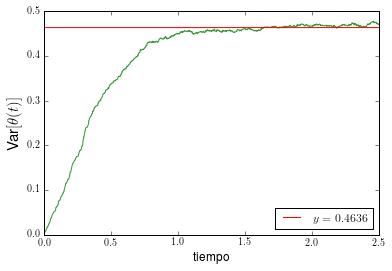

In [67]:
plt.rc('text', usetex=True)
plt.plot(tiempos,var_theta_en_t, alpha = .8, color = 'g')
plt.plot(tiempos, 0.46358922651739204*np.ones(len(tiempos)), 'r', label ="$y = 0.4636$")
plt.ylabel(r'$\mbox{Var}[\theta(t)]$', fontsize = 15)
plt.xlabel('tiempo', fontsize = 12)
plt.legend(loc=4); # down right corner

In [58]:
np.sqrt(.46)

0.67823299831252681

In [28]:
np.mean(var_theta_en_t)

0.30236539516102218

In [276]:
(np.pi**2)/4 -2

0.4674011002723395

In [31]:
npasos = 10000
suma = 0
tiempos = [0]
impulso = dt
for i in range(npasos):
    suma += impulso
    tiempos.append(suma)

In [30]:
tiempos

[0,
 0.0002302585092994046,
 0.0004605170185988092,
 0.00069077552789821378,
 0.0009210340371976184,
 0.0011512925464970229,
 0.0013815510557964276,
 0.0016118095650958322,
 0.0018420680743952368,
 0.0020723265836946414,
 0.0023025850929940458,
 0.0025328436022934503,
 0.0027631021115928547,
 0.0029933606208922591,
 0.0032236191301916635,
 0.0034538776394910679,
 0.0036841361487904723,
 0.0039143946580898767,
 0.0041446531673892811,
 0.0043749116766886855,
 0.00460517018598809,
 0.0048354286952874944,
 0.0050656872045868988,
 0.0052959457138863032,
 0.0055262042231857076,
 0.005756462732485112,
 0.0059867212417845164,
 0.0062169797510839208,
 0.0064472382603833252,
 0.0066774967696827297,
 0.0069077552789821341,
 0.0071380137882815385,
 0.0073682722975809429,
 0.0075985308068803473,
 0.0078287893161797517,
 0.008059047825479157,
 0.0082893063347785623,
 0.0085195648440779675,
 0.0087498233533773728,
 0.0089800818626767781,
 0.0092103403719761834,
 0.0094405988812755887,
 0.009670857390

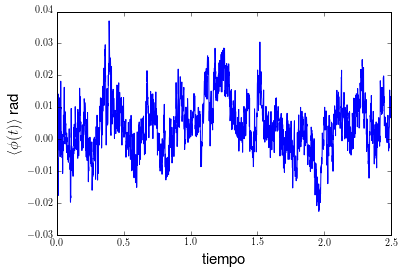

In [68]:
plt.rc('text', usetex=True)  
plt.plot(tiempos, promedio_phi_en_t)
plt.ylabel(r'$\langle \phi(t)\rangle$ $\mbox{rad}$', fontsize = 15)
plt.xlabel('tiempo', fontsize = 15)

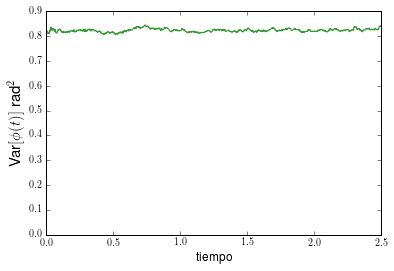

In [69]:
plt.rc('text', usetex=True)
plt.plot(tiempos, var_phi_en_t, alpha = .8, color = 'g')
plt.ylabel(r'$\mbox{Var}[\phi(t)]$ $\mbox{rad}^2$', fontsize = 15)
plt.xlabel('tiempo', fontsize = 12)

In [56]:
#cos_theta = np.cos(promedio_en_t)
log_cos_theta = np.log(cos_theta)

NameError: name 'cos_theta' is not defined

## Una simulación más en donde se ve la presición del algoritmo

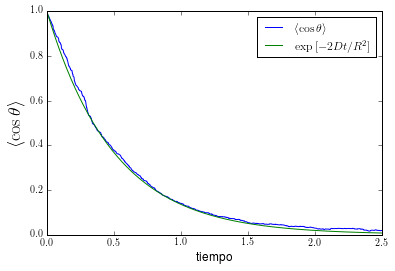

In [70]:
plt.plot(tiempos[:], promedio_cos_theta[:], label=r"$\langle \cos{\theta} \rangle$")
#plt.yscale("log")
#plt.plot(tiempos, np.exp(-4*tiempos))
plt.plot(np.array(tiempos[:]), np.exp(-2*np.array(tiempos[:])), label=r"$\exp{[-2Dt/R^2]}$")
plt.ylabel(r'$\langle \cos{\theta} \rangle$', fontsize = 18)
plt.xlabel('tiempo', fontsize = 12)
plt.legend(loc=0); # upper right

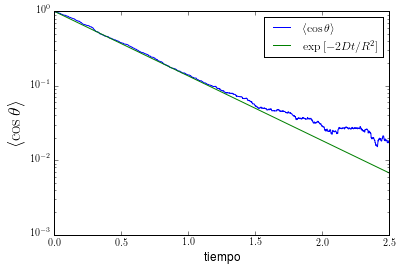

In [71]:
plt.plot(tiempos[:], promedio_cos_theta[:], label=r"$\langle \cos{\theta} \rangle$")
#plt.yscale("log")
#plt.plot(tiempos, np.exp(-4*tiempos))
plt.plot(np.array(tiempos[:]), np.exp(-2*np.array(tiempos[:])), label=r"$\exp{[-2Dt/R^2]}$")
plt.ylabel(r'$\langle \cos{\theta} \rangle$', fontsize = 18)
plt.yscale("log")
plt.xlabel('tiempo', fontsize = 12)
plt.legend(loc=0); # upper right

In [72]:
A = np.vstack((tiempos, np.ones(len(tiempos)))).T
m, c = np.linalg.lstsq(A, np.log(np.array(promedio_cos_theta)))[0]
print m, c

-1.650188597 -0.19781314834


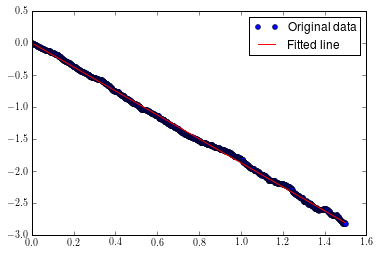

In [64]:
plt.plot(tiempos, np.log(np.array(promedio_cos_theta)), 'o', label='Original data', markersize=5)
plt.plot(tiempos, m*np.array(tiempos) + c, 'r', label='Fitted line')
plt.legend()
plt.show()

## Para el ajuste de la recta

In [42]:
m

-1.8750965595664355

In [228]:
m*np.array(tiempos)

array([-0.        , -0.00471191, -0.00942383, ..., -4.7024889 ,
       -4.70720081, -4.71191272])

In [220]:
b*np.ones(len(tiempos))

array([ 0.01902013,  0.01902013,  0.01902013, ...,  0.01902013,
        0.01902013,  0.01902013])

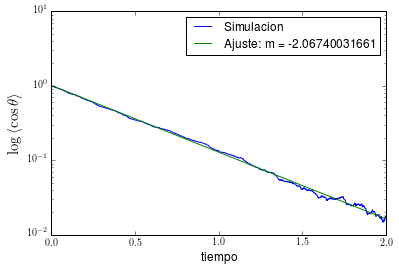

In [19]:
y = np.exp(m*np.array(tiempos) + c*np.ones(len(tiempos)))

plt.plot(tiempos, promedio_cos_theta, label = "Simulacion")
plt.plot(tiempos, y, label = "Ajuste: m = {}".format(m))
plt.yscale("log")
#plt.yscale("log")
#plt.plot(tiempos, np.exp(-4*tiempos))
#plt.plot(np.array(tiempos), np.exp(-2*np.array(tiempos)))
plt.ylabel(r'$\log{\langle \cos{\theta} \rangle}$', fontsize = 15)
plt.xlabel('tiempo', fontsize = 12)
plt.yscale("log")
plt.legend(loc=0);

In [185]:
m = (log_cos_theta[600] - log_cos_theta[0])/(tiempos[600] - tiempos[0])

In [186]:
m

-2.1813949100330605

In [66]:
m,b = np.polyfit(tiempos[:50],promedio_cos_theta[:50],1)

In [67]:
m

-1.7694248358257085

In [214]:
b

0.019020131276243829

In [215]:
y = m*np.array(tiempos) + b*np.ones(1001)

In [190]:
!pwd

/Users/adriano/Documents/Tesis_Maestria/Notebooks_ipy/Simulaciones_01


In [191]:
%cd /Users/adriano/Documents/Tesis_Maestria/Notebooks_ipy/

/Users/adriano/Documents/Tesis_Maestria/Notebooks_ipy


In [192]:
%%file Brownian_Sphere_code_02vf01.py
# %load Brownian_Sphere_code_02.py

import numpy as np
from matplotlib import pyplot as plt

#Funcion que toma un vector y regresa otro ortogonal a este.
def orto(x):
    if np.dot(x,x) == 0:
        return 'Pendejo: ese es el vector cero!'
    else:
        if 0 not in x:
            v1 = 1
            v2 = -(x[0]/x[1])
            v3 = 0
            #return np.array([v1,v2,v3])
        else:
            if x[0] == 0:
                if x[1] == 0:
                    v1 = 1
                    v2 = 0
                    v3 = 0
                else:
                    v1 = 0
                    v2 = 0
                    v3 = 1
            elif x[1] == 0:
                v1 = 0
                v2 = 1
                v3 = 0
            else:
                v1 = 0
                v2 = 0
                v3 = 1
        return np.array([v1,v2,v3])
    
#Funcion que regresa dos vectores; numpy arrays, de 3D ortogonales al vector de imput x.
def base_ort_nor(x):
    y = orto(x)
    v1 = y/np.linalg.norm(y)
    z = np.cross(x,v1)
    v2 = z/np.linalg.norm(z)
    return v1, v2


#Esta funcion genera un vector con distrubucion uniforme en las direcciones sobre un plano tangente a la esfera de radio R.
def vector_des(v1,v2):
    na = 2*np.pi*np.random.rand()
    vn = v1*np.cos(na) + v2*np.sin(na)
    return vn/np.linalg.norm(vn)

R = 1

#Normalizamos al vector de desplazamiento para que intersecte al vector de la nueva posicion de acuerdo con que el
#desplazamiento (s) sobre la esfera, sobre este arco de circulo maximo, sea el determinado por el movimiento browniano particular.
def vector_q(x,s):
    q = (R)*np.tan(s/(R))
    return q*x

#Dados todos los datos anteriores, esta funcion actualiza la posición de la particula.
def nuevo_r(r, vector_q):
    y = r + vector_q
    y = y/np.linalg.norm(y)
    return (R)*y

#Esta funcion ensambla todo lo anterior: como imput necesita una pocision inicial y un arco de desplazamiento
#Como output da un vector de posicion nuevo dada un tipo de desplazamiento.
def actualiza(r,s):
    v1, v2 = base_ort_nor(r)
    pre_q = vector_des(v1,v2)
    q = vector_q(pre_q, s)
    return nuevo_r(r, q)

#Esta funcion cuando es llamada grafia la posicion de la particula browniana
#sobre la superficie de una esfera sobre la que se esta difundiendo.
def plot_particle(r,i):
    from mpl_toolkits.mplot3d import axes3d
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm

    #import matplotlib.pyplot as plt
    #import numpy as np
    from itertools import product, combinations
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")

    #draw a point
    ax.scatter([r[0]],[r[1]],[r[2]],color="b",s=100)
    
    
    
    

    #draw sphere
    u, v = np.mgrid[0:2*np.pi:50j, (np.pi/7):np.pi:50j]
    x=R*np.cos(u)*np.sin(v)
    y=R*np.sin(u)*np.sin(v)
    z=R*np.cos(v)
    #ax.plot_surface(x, y, z, color="r", alpha = 0.15)
    ax.plot_surface(x, y, z, cmap=cm.YlGnBu_r,rstride=1, cstride=1, alpha = 0.55, linewidth = 0.15)



    #draw patch
    u, v = np.mgrid[0:2*np.pi:50j, 0:(np.pi/7):50j]
    x=R*np.cos(u)*np.sin(v)
    y=R*np.sin(u)*np.sin(v)
    z=R*np.cos(v)
    ax.plot_surface(x, y, z, color="r", alpha = 0.25)
    


    ax.view_init(80, 30)
    #fig.savefig('BS_Rand_01.{}.png'.format(i))
    
    plt.show()
    

    
#Esta funcion Genera n posiciones aleatorias sobre la superficie de la esfera de radio R.
#El proposito de tener esta funcion es el de generar de manera automatizada
#Una condicion inicial con distribucion uniforme sobre la esfera para varaias particulas Brownianas.
def P_INS(n,R):
    l = []
    for i in range(n):
        a1 = 2*np.pi*np.random.rand()
        a2 = np.pi*np.random.rand()
        l.append(np.array([R*np.sin(a2)*np.cos(a1),R*np.sin(a2)*np.sin(a1),R*np.cos(a2)]))
    return l

#Esta funcion cuando es llamada grafia la posicion de las partoculas brownianas.
#sobre la superficie de una esfera sobre la que se esta difundiendo.
def plot_particles(lista, vpolar, vazim, numero):
    from mpl_toolkits.mplot3d import axes3d
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm

    #import matplotlib.pyplot as plt
    #import numpy as np
    from itertools import product, combinations
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")

    



    #draw sphere
    R = 1
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    x=R*np.cos(u)*np.sin(v)
    y=R*np.sin(u)*np.sin(v)
    z=R*np.cos(v)
    #ax.plot_surface(x, y, z, color="r", alpha = 0.15)

    ax.plot_surface(x, y, z, cmap=cm.YlGnBu_r,rstride=1, cstride=1, alpha = 0.55, linewidth = 0.15)
    ax.view_init(vpolar, vazim)
    #draw patch
    #u, v = np.mgrid[0:2*np.pi:50j, 0:(np.pi/7):50j]
    #x=R*np.cos(u)*np.sin(v)
    #y=R*np.sin(u)*np.sin(v)
    #z=R*np.cos(v)
    #ax.plot_surface(x, y, z, color="r", alpha = 0.25)    
    
    #draw points
    for p in lista:
        ax.scatter([p[0]],[p[1]],[p[2]],color="b",s=150)
    
    fig.savefig('BS_Obs_01.{}.png'.format(nombre(numero)))
    #ax.view_init(80, 30)
    plt.show()
    
#Esta función actualiza la posicion de todos los elementos de una lista; partícula brownianas.
def act_n(lista,s):
    l = []
    for v in lista:
        l.append(actualiza(v,s))
    return l

#Esta funcion simula la evolucion de n particulas brownianas difundiendose sobre la superficie de una esfera.
#Grafica cada paso o instantanea del sistema completo.
def sim_n_pb(lista, m):
    plot_particles(lista)
    sigma = lista
    for i in range(m):
        eta = act_n(sigma)
        plot_particles(eta)
        sigma = eta
        
#Funcion que pone n particulas en el polo norte de una esfera
def polo_n(n, R):
    l = []
    for i in range(n):
        l.append(np.array([0,0,R]))
    return l


#Operador de Rotación


def rot_theta(r, theta, u):
    x = np.array([np.cos(theta) + (u[0]*u[0])*(1 - np.cos(theta)), u[0]*u[1]*(1 - np.cos(theta)) - u[2]*np.sin(theta), u[0]*u[2]*(1 - np.cos(theta)) + u[1]*np.sin(theta)])
    y = np.array([u[1]*u[0]*(1 - np.cos(theta)) + u[2]*np.sin(theta), np.cos(theta) + u[1]*u[1]*(1 - np.cos(theta)), u[1]*u[2]*(1 - np.cos(theta)) - u[0]*np.sin(theta)])
    z = np.array([u[2]*u[0]*(1 - np.cos(theta)) - u[1]*np.sin(theta), u[2]*u[1]*(1 - np.cos(theta)) + u[0]*np.sin(theta), np.cos(theta) + u[2]*u[2]*(1 - np.cos(theta))])
    R = np.array([x,y,z])
    return np.dot(R, r)


#Huella de la trayectoria
#La siguiente funcion hace una particion de la trayectoria sobre s en n pedazos y regresa
#una lista de los vectores de esas posiciones sobre la esfera.
#Usa al operador de rotacion.

def b_steps(ri,rf,n):
    l = [ri]
    r0 = ri
    theta = np.arccos((np.dot(ri,rf))/((np.linalg.norm(ri))*(np.linalg.norm(rf))))
    normal = np.cross(ri, rf)/ np.linalg.norm(np.cross(ri,rf))
    for i in range(1,n + 1):
        vi = rot_theta(r0, theta/n, normal)
        l.append(vi)
        r0 = vi
    return l



#Transformacion de coordenada de esfericas a cartesianas.


def trans_s_c(r,theta, phi):
    x = r*np.sin(theta)*np.cos(phi)
    y = r*np.sin(theta)* np.sin(phi)
    z = r*np.cos(theta)
    return x, y, z


#Transformacion de coordenadas de cartesianas a esfericas.

def trans_c_s(x,y,z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z/r)
    phi = np.arctan(y/x)
    return r, theta, phi




def r_uni(theta, phi):
    x = np.sin(theta)*np.cos(phi)
    y = np.cos(theta)*np.cos(phi)
    z = np.cos(theta)
    return np.array([x,y,z])
def theta_uni(theta, phi):
    x = np.cos(theta)*np.cos(phi)
    y = np.cos(theta)*np.sin(phi)
    z = -np.sin(theta)
    return np.array([x,y,z])
def phi_uni(theta, phi):
    x = -np.sin(theta)
    y = np.cos(phi)
    z = 0
    return np.array([x,y,z])



def collision_update(lista_vect, r_omega, theta_omega):
    for v in lista_vect:
        #angulo = np.arccos(np.dot(v,r_omega)/(np.linalg.norm(v)*np.linalg.norm(r_omega)))
        #print angulo, theta_omega
        tamanho = (R**2)*np.cos(theta_omega)
        if np.dot(v,r_omega) >= tamanho:
            print 'Choco el mother fucker'
            rp = v
            np_prima = np.cross(np.cross(r_omega, rp), rp)
            nor_p = np_prima/np.linalg.norm(np_prima)
            up_prima = np.cross(np.cross(lista_vect[0], lista_vect[-1]), rp)
            up = up_prima/np.linalg.norm(up_prima)
            tp_prima = np.cross(rp, nor_p)
            tp = tp_prima/np.linalg.norm(tp_prima)
            x = (np.dot(up,tp))*tp - (np.dot(up, nor_p))*nor_p
            v_rot_prima = np.cross(rp, x)
            v_rot = v_rot_prima/np.linalg.norm(v_rot_prima)
            ang_dif = np.arccos(np.dot(v,lista_vect[-1])/(np.linalg.norm(v)*np.linalg.norm(lista_vect[-1])))
            posicion_final = rot_theta(rp, ang_dif, v_rot)
            return v, posicion_final
        else:
            continue
    print 'no choco el mother fucker'
    return lista_vect[0], lista_vect[-1]
def nombre(s):
    diferencia = 4 - len(str(s))
    ceros = '' 
    for i in range(diferencia):
        ceros = ceros + '0'
    variable = ceros + str(s)
    return variable

#Varianza para una distribucion bigaussiana; difusion en 2D
def var(D, delta_t):
    return 4*D*delta_t


#Arco de circulo maximo con distribucion normal alrededor de cero y una varianza dada por

def ese(D,delta_t):
    return abs(np.random.normal(loc = 0., scale = np.sqrt(var(D,delta_t)),size = None))




#Definimos las condiciones inciales

# R es el radio de la esfera

R=1
def exit_time(R):
    t0 = 0
    x0 = np.array([0,0,R])
    x = x0
    t = t0
    for i in range(550):
        t = t + 25e-6
        x = actualiza(x,ese())
        #plot_particle(x,i)
        theta_x = np.arccos(x[2]/R)
        if theta_R < theta_x:
            return  t
        else:
            continue
    return 'no salio de la region'


#R = 1
#D = 1
#dt = (np.pi**2)/4
origen = polo_n(10000,R)
promedio_theta_en_t = [0]
promedio_phi_en_t = [0]
promedio_cos_theta = [np.cos(0)]
var_theta_en_t = [0]
var_phi_en_t = [0]
posicion_vec = origen
t_final = 1000

for i in range(t_final):
    nuevos_vec = act_n(posicion_vec, ese(D,dt))
    thetas = []
    phis = []
    thetas_al_2 = []
    phis_al_2 = []
    for v in nuevos_vec:
        theta = np.arccos(v[2]/R)
        phi = np.arctan(v[1]/v[2])
        thetas.append(theta)
        phis.append(phi)
        thetas_al_2.append(theta**2)
        phis_al_2.append(phi**2)
    
    #Aqui vamos a salvar una instantanea de cada uno de los histogramas
    #de theta
    #plt.hist(thetas, 100, color = 'g', normed=True)
    #plt.xlabel(r"$\theta$", fontsize = 15)
    #plt.xlim(0,np.pi)
    #plt.ylabel("Frecuencia", fontsize = 15)
    #plt.ylim(0,1)
    #plt.title("Paso = {}".format(i), fontsize = 15)
    #plt.savefig('Histograma_theta_{}'.format(nombre(i)))
    #plt.close()
    mean_cos_theta = np.mean(np.cos(thetas))
    mean_theta = np.mean(thetas)
    mean_phi = np.mean(phis)
    mean_theta_cuad = np.mean(thetas_al_2)
    mean_phi_cuad = np.mean(phis_al_2)
    var_theta_en_t.append(mean_theta_cuad - mean_theta**2)
    var_phi_en_t.append(mean_phi_cuad - mean_phi**2)
    promedio_theta_en_t.append(mean_theta)
    promedio_phi_en_t.append(mean_phi)
    posicion_vec = nuevos_vec
    promedio_cos_theta.append(mean_cos_theta)


Writing Brownian_Sphere_code_02vf01.py


In [19]:
!pwd

/Users/adriano/Documents/Tesis_Maestria/Notebooks_ipy/Histograma_Thesis_theta_NO_02


In [20]:
!mencoder "mf://*.png" -o BS_Histograma_Thesis_01.avi -ovc lavc -lavcopts vcodec=msmpeg4v2:autoaspect:vbitrate=2160000:mbd=2:keyint=132:vqblur=1.0:cmp=2:subcmp=2:dia=2:mv0:last_pred=3 -fps 4

MEncoder 1.1-4.2.1 (C) 2000-2012 MPlayer Team
192 audio & 400 video codecs
success: format: 16  data: 0x0 - 0x0
MF file format detected.
[mf] search expr: *.png
[mf] number of files: 2000 (16000)
[demux_mf] file type was not set! trying 'type=png'...
VIDEO:  [MPNG]  0x0  24bpp  25.000 fps    0.0 kbps ( 0.0 kbyte/s)
[V] filefmt:16  fourcc:0x474E504D  size:0x0  fps:25.000  ftime:=0.0400
Input fps will be interpreted as 4.000 instead.
libavcodec version 54.23.100 (internal)
Opening video filter: [expand osd=1]
Expand: -1 x -1, -1 ; -1, osd: 1, aspect: 0.000000, round: 1
Opening video decoder: [ffmpeg] FFmpeg's libavcodec codec family
Selected video codec: [ffpng] vfm: ffmpeg (FFmpeg PNG)
Could not find matching colorspace - retrying with -vf scale...
Opening video filter: [scale]
Movie-Aspect is undefined - no prescaling applied.
[swscaler @ 0x10cc84e90]BICUBIC scaler, from rgba to yuv420p using MMX2
videocodec: libavcodec (432x288 fourcc=3234504d [MP42])
[VE_LAVC] High quality encoding s